# DL Optimizers Research 
## AI를 위한 통계학 HW2
1. Nesterov Accelerated Gradient
2. Adadelta
3. AdaMax
4. NAdam
5. AdamW


## 1. Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28) (60000,)


## 2. Load Dataset

In [3]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## 3. Model Building

In [4]:
batch_size=64

num_classes=10

epochs=10

def build_model(optimizer):

    model=Sequential()

    model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])

    return model

## 4. Model Training
1. Nesterov Accelerated Gradient
2. Adadelta
3. AdaMax
4. NAdam
5. AdamW

In [32]:
# define Nesterov Accelerated Gradient 
NAG = tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=True, name="SGD")

# define AdamW 
AdamW = tf.keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.004, beta_1=0.9, beta_2=0.999,
    epsilon=1e-07, amsgrad=False, clipnorm=None, clipvalue=None, global_clipnorm=None, use_ema=False,
    ema_momentum=0.99, ema_overwrite_frequency=None, jit_compile=True, name='AdamW')

# set optimizers 
opitmizers = [NAG,'Adadelta','Adamax','Nadam',AdamW,  # Assignment Optimizers 
              'Adagrad','Adam','RMSprop','SGD']   # General Optimizers 

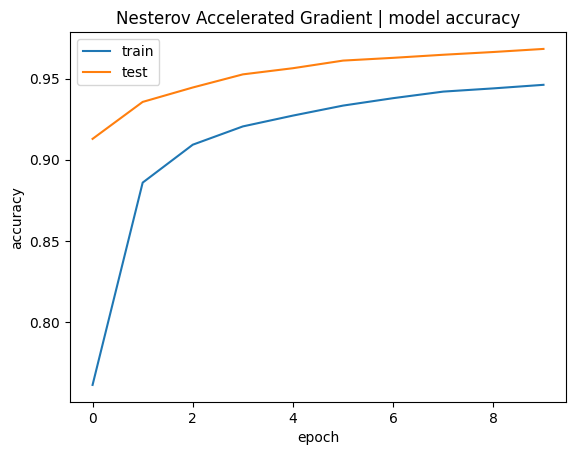

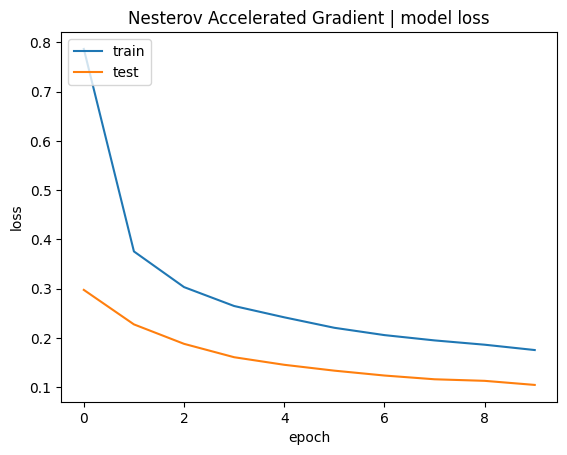

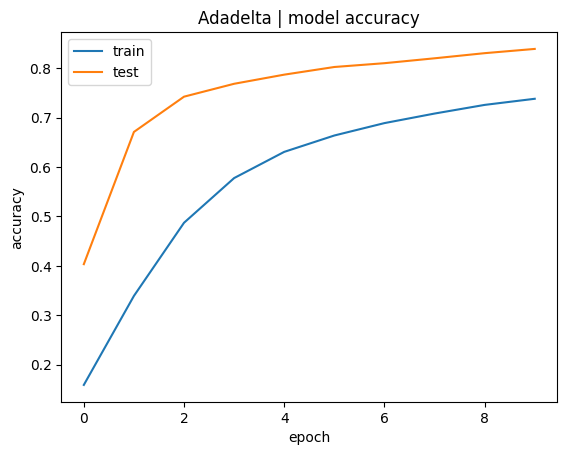

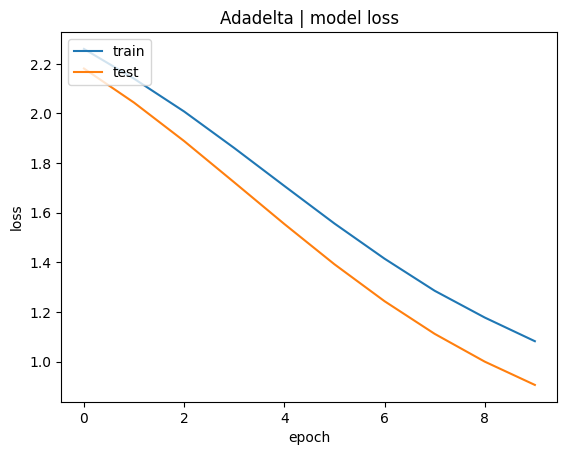

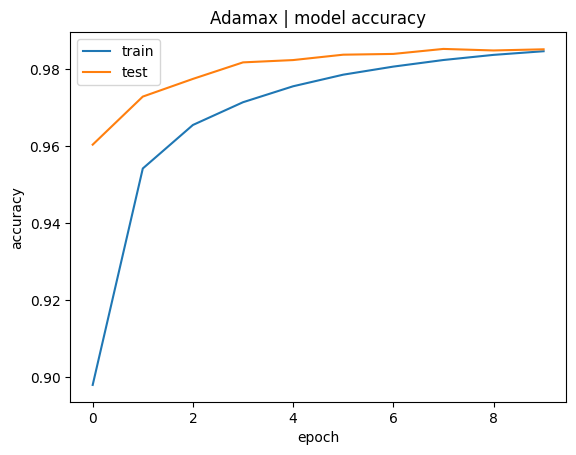

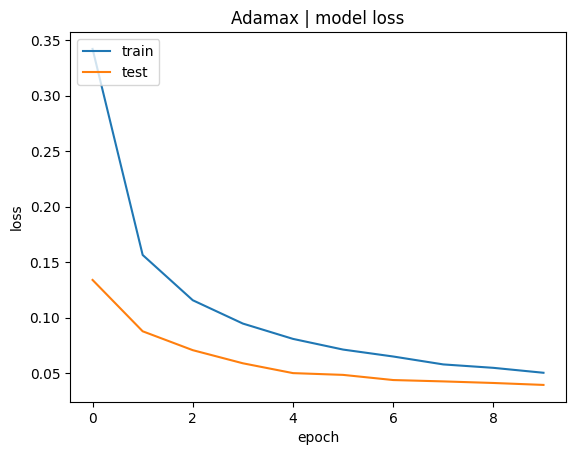

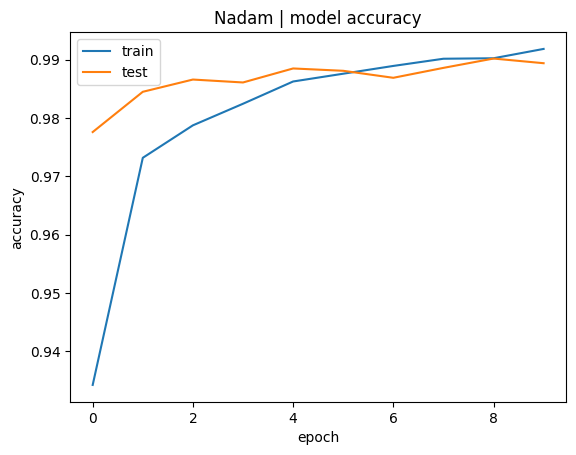

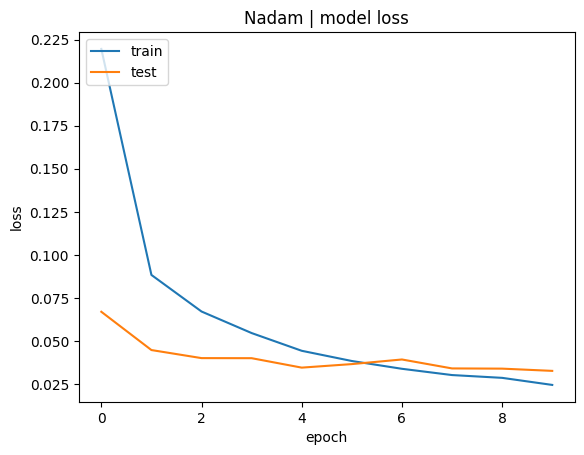

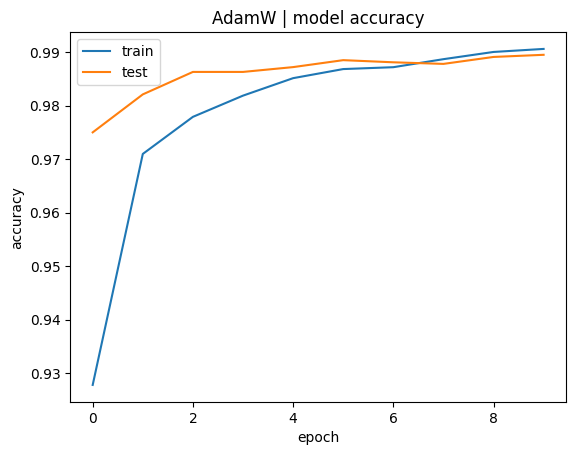

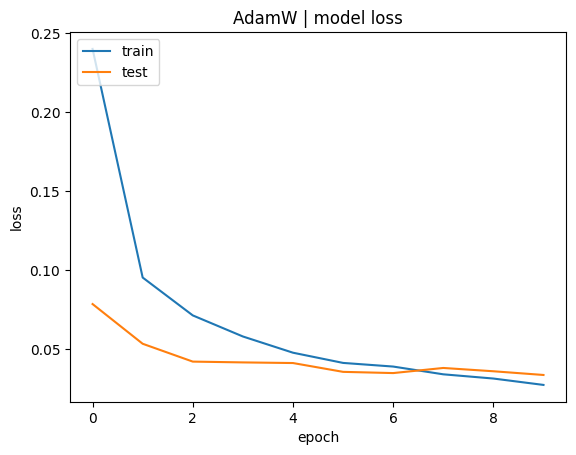

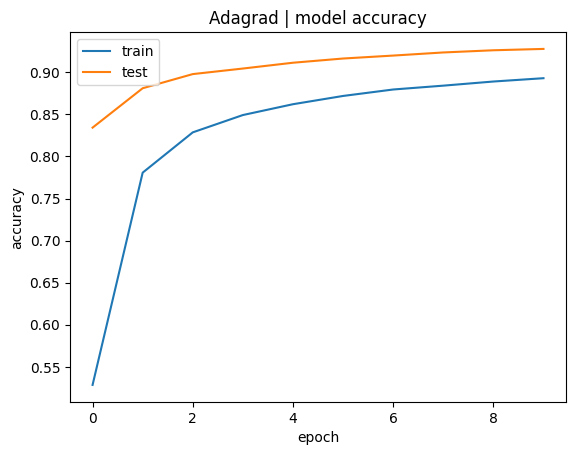

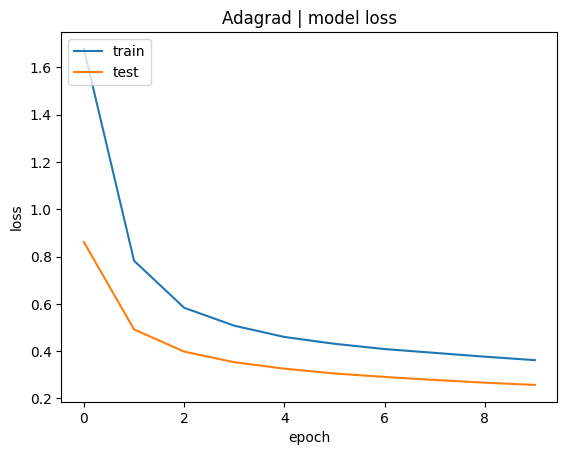

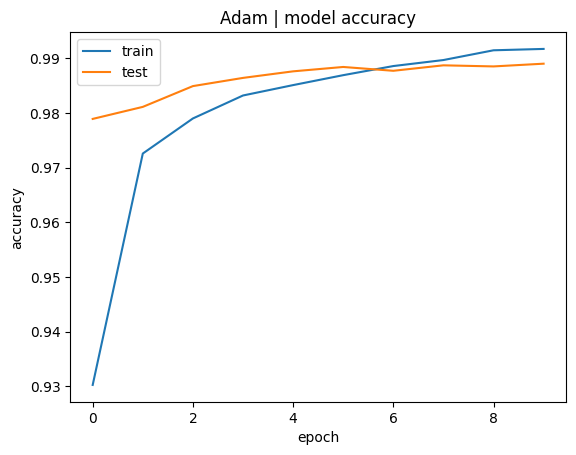

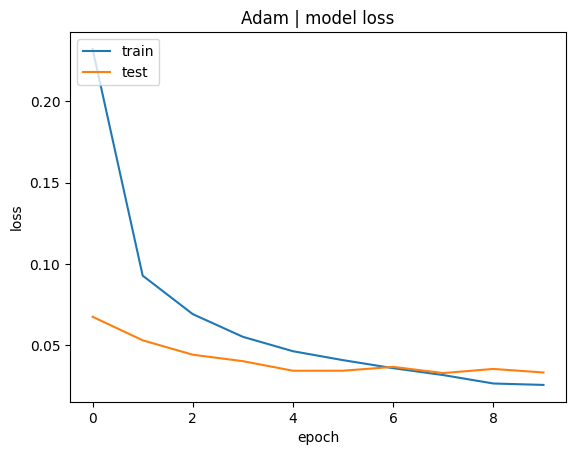

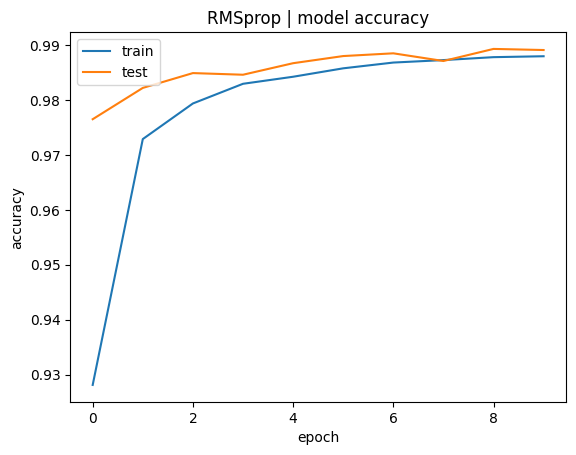

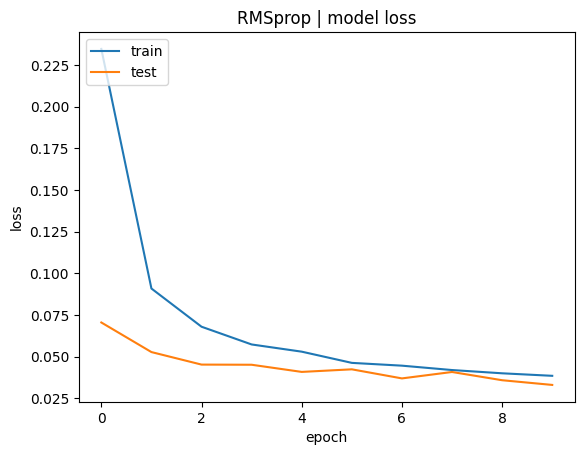

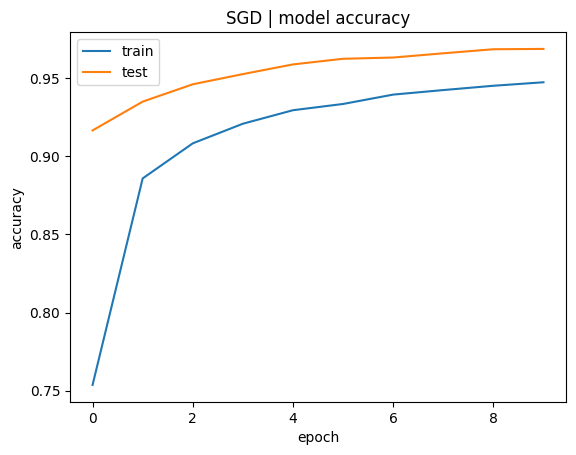

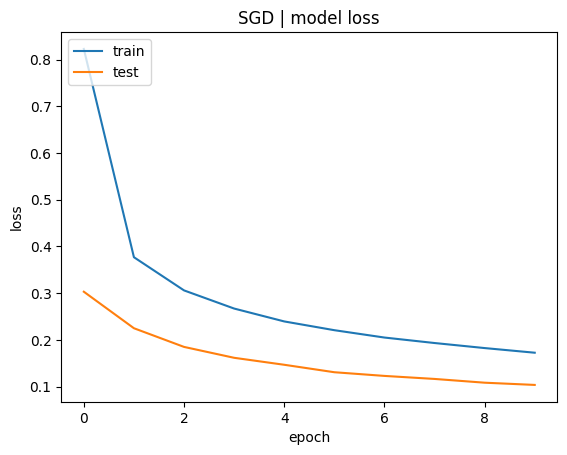

In [33]:
accuracy = {}
loss = {}

for i in opitmizers: 
    model = build_model(i)  
    hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test,y_test))

    # summarize history for accuracy 
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    if i == AdamW: 
        plt.title('AdamW | model accuracy') 
        accuracy['AdamW'] = hist.history['accuracy']
    elif i == NAG:
        plt.title('Nesterov Accelerated Gradient | model accuracy')       
        accuracy['NAG'] = hist.history['accuracy']
    else:
        plt.title(f'{i} | model accuracy')
        accuracy[i] = hist.history['accuracy']
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    if i == AdamW: 
        plt.title('AdamW | model loss')        
        loss['AdamW'] = hist.history['loss'] 
    elif i == NAG:
        plt.title('Nesterov Accelerated Gradient | model loss')       
        loss['NAG'] = hist.history['loss'] 
    else:
        plt.title(f'{i} | model loss')
        loss[i] = hist.history['loss'] 
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [7]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [47]:
acc_df = pd.DataFrame(accuracy)
acc_df.index.name = 'epochs' 
acc_df

,NAG,Adadelta,Adamax,Nadam,AdamW,Adagrad,Adam,RMSprop,SGD
epochs,,,,,,,,,
0,0.761067,0.158850,0.897900,0.934250,0.927783,0.528567,0.930250,0.928117,0.753717
1,0.885900,0.339117,0.954200,0.973183,0.970967,0.780733,0.972567,0.972883,0.885717
2,0.909300,0.487267,0.965517,0.978750,0.977900,0.828583,0.978983,0.979367,0.908150
3,0.920583,0.577750,0.971433,0.982450,0.981867,0.849150,0.983183,0.982950,0.920683
4,0.927267,0.630817,0.975583,0.986267,0.985133,0.862017,0.985083,0.984233,0.929317
5,0.933433,0.663967,0.978600,0.987600,0.986833,0.871833,0.986900,0.985767,0.933317
6,0.938017,0.689067,0.980700,0.988933,0.987183,0.879500,0.988567,0.986817,0.939300
7,0.942067,0.708400,0.982417,0.990167,0.988683,0.884067,0.989667,0.987267,0.942200
8,0.944050,0.725933,0.983750,0.990250,0.990033,0.888983,0.991450,0.987800,0.944950


In [48]:
loss_df = pd.DataFrame(loss)
loss_df.index.name = 'epochs'
loss_df

,NAG,Adadelta,Adamax,Nadam,AdamW,Adagrad,Adam,RMSprop,SGD
epochs,,,,,,,,,
0,0.786630,2.260070,0.342004,0.219621,0.239950,1.677968,0.232286,0.234613,0.822878
1,0.375404,2.140029,0.156423,0.088321,0.095180,0.782282,0.092778,0.090904,0.376927
2,0.302985,2.007822,0.115651,0.067077,0.071202,0.583326,0.069087,0.067988,0.305872
3,0.264577,1.860709,0.094641,0.054561,0.057861,0.507560,0.055127,0.057347,0.267020
4,0.241628,1.707850,0.080849,0.044258,0.047583,0.459916,0.046257,0.053026,0.239440
5,0.220359,1.556440,0.071224,0.038327,0.041116,0.430991,0.040761,0.046301,0.220692
6,0.205505,1.414703,0.064982,0.033798,0.038811,0.408722,0.035824,0.044629,0.204944
7,0.194730,1.285467,0.057849,0.030163,0.033898,0.392654,0.031582,0.042003,0.193216
8,0.186004,1.177519,0.054771,0.028537,0.031224,0.376500,0.026400,0.040048,0.182410


In [50]:
acc_df.to_csv('accuracy-AIstats-optimizers.csv')
loss_df.to_csv('loss-AIstats-optimizers.csv')